In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import pandas as pd
from repast4py import parameters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define your custom colors
colors = ["white", "blue", "red"]

# Create a colormap using ListedColormap
custom_cmap = ListedColormap(colors)

In [31]:
from scipy.signal import correlate2d


class Animator:
    """
    Class for animating the model. Takes a log (.csv) and uses the x,y
    coordinates of agents to chart movement over time.
    """

    def __init__(self, csv="out/agent_log_hierarchical.csv"):
        # Read csv file into a Pandas DataFrame
        self.df = pd.read_csv(csv)
        self.leftoff = 0
        self.iters_per_tick = (
            self.df["tick"] - 0.0000000000000000001 < 1.1
        ).sum()

        params = params = {
            "world.height": 500,  # m
            "world.width": 500,  # m
            "stop.at": 3600,  # ticks, representing 12 hours
            "squad.count": 80,
            "meet_log_file": "./out/meet_log.csv",
            "agent_log_file": "./out/agent_log.csv",
            "InfectionRegion.height": 25,
            "InfectionRegion.width": 25,
        }
        self.rows = params["world.height"]
        self.cols = params["world.width"]
        self.grid = np.zeros((self.rows, self.cols))
        self.rgrid = self.grid
        # Set the initial state of the grid
        for _, row in self.df.iterrows():
            if (
                int(row["tick"]) < 0.2
            ):  # check if it's close to 0, but not bigger than 1
                self.grid[int(row["x"])][int(row["y"])] = 1
                if row["infected"]:
                    self.grid[int(row["x"])][int(row["y"])] = 2
                self.leftoff += 1

    def reset_grid(self):
        self.grid = np.zeros((self.rows, self.cols))

    def step(self):
        self.leftoff += 1
        if self.leftoff > len(self.df):
            return
        self.reset_grid()
        cur_tick = self.df.iloc[self.leftoff]["tick"]
        count = 0
        for idx in range(
            round(cur_tick), round(cur_tick) + self.iters_per_tick
        ):
            count += 1
            row = self.df.iloc[idx]
            self.grid[int(row["x"])][int(row["y"])] = 1
            if row["infected"]:
                self.grid[int(row["x"])][int(row["y"])] = 2
            self.leftoff += 1

        if count > 320:
            print("count > 320, bug")

    def draw(self, lim):
        """
        Draw the grid at one tick
        """
        options = dict(
            cmap=custom_cmap,
            extent=[0, self.rows, 0, self.cols],
            interpolation="none",
            origin="upper",
            alpha=0.7,
        )
        plt.axis([0, self.rows, 0, self.cols])
        plt.xlim((lim[0], lim[1]))
        plt.ylim((lim[2], lim[3]))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(self.grid, **options)

    # def make_repr(self):
    #     # Find indices of ones in the array
    #     self.rgrid = self.grid
    #     one_indices = np.argwhere(self.grid == 1)

    #     # # Pad the array to handle edge cases
    #     # padded_arr = np.pad(self.grid, [(1, 1), (1, 1)], mode='constant')

    #     # # Convolve with the kernel
    #     # result = correlate2d(padded_arr, self.kernel, mode='same')

    #     # Replace the values around ones with 1
    #     for i, j in one_indices:
    #         self.rgrid[i:i+3, j:j+3] = 1

    #     return result

    def animate(self, frames: int, lim=[0, 500, 0, 500]):
        """
        Animate the ACO optimization for the given number of frames

        Args:
        frames: an int, the number of frames to animate
        """
        plt.figure()
        try:
            for i in range(frames - 1):
                # print(i)
                self.draw(lim)
                plt.show()
                self.step()
                # self.rgrid = self.make_repr()
                # print(self.rgrid)
                clear_output(wait=True)
            self.draw(lim)
            plt.show()
        except KeyboardInterrupt:
            pass

    def save(self, frames: int, lim=[0, 500, 0, 500]):
        """
        Animate the ACO optimization for the given number of frames

        Args:
        frames: an int, the number of frames to animate
        """
        fig = plt.figure()
        try:
            for i in range(frames - 1):
                fig.savefig(f'steps/hierarchical/hierarchical_{i}.png')
                self.draw(lim)
                self.step()
                clear_output(wait=True)
            self.draw(lim)
            fig.show()
        except KeyboardInterrupt:
            pass

In [14]:
params = {
    "world.height": 500,  # m
    "world.width": 500,  # m
    "stop.at": 3600,  # ticks, representing 12 hours
    "squad.count": 80,
    "meet_log_file": "./out/meet_log.csv",
    "agent_log_file": "./out/agent_log.csv",
    "InfectionRegion.height": 25,
    "InfectionRegion.width": 25,
}

/tmp/ipykernel_9200/3643958364.py:137: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


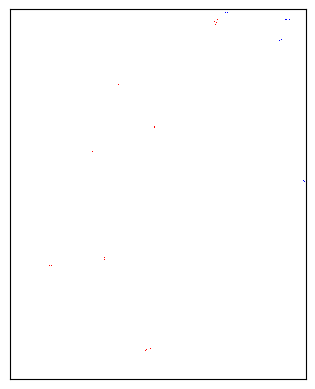

In [32]:
a = Animator()
a.save(500, [0, 400, 0, 500])

In [16]:
print(a.iters_per_tick)

60
